# Category Prediction on BBC-news data

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

import json, re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from helper import process_text

data_dir = '../nlp_datasets/14_bbc_news_category/'

[nltk_data] Error loading stopwords: HTTP Error 500: Internal Server
[nltk_data]     Error


In [2]:
df = pd.read_csv(data_dir+'bbc-text.csv')
print ('data.shape:',df.shape)
df.head(2)

data.shape: (2225, 2)


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...


In [3]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

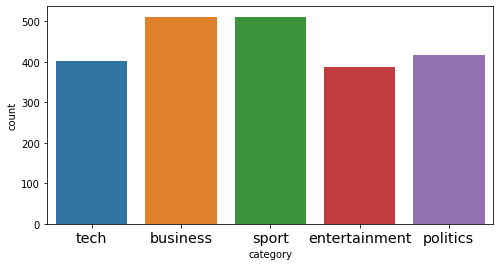

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,4));
sns.countplot(df['category'], ax=ax);
plt.xticks(fontsize='x-large');

## Label Encoding

- convert the labels to numerical labels
- can use sklearn.preprocessing import LabelEncoder()
- but here implement your own. it's simple


In [5]:
label_dict = {df.category.unique()[i]:i for i in range(len(df.category.unique()))}
label_dict_reversed = { v:k for (k,v) in label_dict.items() }

print ( label_dict, label_dict_reversed)


{'tech': 0, 'business': 1, 'sport': 2, 'entertainment': 3, 'politics': 4} {0: 'tech', 1: 'business', 2: 'sport', 3: 'entertainment', 4: 'politics'}


In [6]:
df['label'] = df['category'].apply(lambda x:label_dict[x])
df.head(5)

,category,text,label
0,tech,tv future in the hands of viewers with home th...,0
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,2
3,sport,yeading face newcastle in fa cup premiership s...,2
4,entertainment,ocean s twelve raids box office ocean s twelve...,3


In [7]:
print ( "original text:", df.text[12][:100])
print ("processed text:", process_text(df.text[12][:100])) 

original text: crude oil prices back above $50 cold weather across parts of the united states and much of europe ha
processed text: crude oil price back cold weather across part unit state much europ ha


In [8]:
df['text_processed'] = df['text'].apply(process_text)
df['text_len'] = df['text_processed'].apply(lambda x: len(x.split()))

df.head(2)

,category,text,label,text_processed,text_len
0,tech,tv future in the hands of viewers with home th...,0,tv futur hand viewer home theatr system plasma...,407
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left book alon former worldcom b...,186


In [9]:
df.to_csv("bbc_text_processed.csv", index=False)

In [10]:
import json

with open('label_dict.json', 'w') as fp:
    json.dump(label_dict, fp)
    
with open('label_dict_reversed.json', 'w') as fp:
    json.dump(label_dict_reversed, fp)